# Desafio 5

Neste desafio, vamos praticar sobre redução de dimensionalidade com PCA e seleção de variáveis com RFE. Utilizaremos o _data set_ [Fifa 2019](https://www.kaggle.com/karangadiya/fifa19), contendo originalmente 89 variáveis de mais de 18 mil jogadores do _game_ FIFA 2019.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats as st
from sklearn.decomposition import PCA

#!pip install loguru
from loguru import logger

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
#!pip install logger

In [4]:
fifa = pd.read_csv("fifa.csv")

In [5]:
columns_to_drop = ["Unnamed: 0", "ID", "Name", "Photo", "Nationality", "Flag",
                   "Club", "Club Logo", "Value", "Wage", "Special", "Preferred Foot",
                   "International Reputation", "Weak Foot", "Skill Moves", "Work Rate",
                   "Body Type", "Real Face", "Position", "Jersey Number", "Joined",
                   "Loaned From", "Contract Valid Until", "Height", "Weight", "LS",
                   "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM",
                   "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM", "RDM", "RWB", "LB", "LCB",
                   "CB", "RCB", "RB", "Release Clause"
]

try:
    fifa.drop(columns_to_drop, axis=1, inplace=True)
except KeyError:
    logger.warning(f"Columns already dropped")

## Inicia sua análise a partir daqui

In [6]:
# Sua análise começa aqui.


In [7]:
#fifa.fillna(0,inplace=True)
fifa.dropna(inplace=True)

In [8]:
fifa.shape


(18159, 37)

In [9]:
fifa.describe()

,Age,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122529,66.249904,71.319126,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.670568,6.914613,6.134420,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [10]:
fifa.dtypes

Age                  int64
Overall              int64
Potential            int64
Crossing           float64
Finishing          float64
HeadingAccuracy    float64
ShortPassing       float64
Volleys            float64
Dribbling          float64
Curve              float64
FKAccuracy         float64
LongPassing        float64
BallControl        float64
Acceleration       float64
SprintSpeed        float64
Agility            float64
Reactions          float64
Balance            float64
ShotPower          float64
Jumping            float64
Stamina            float64
Strength           float64
LongShots          float64
Aggression         float64
Interceptions      float64
Positioning        float64
Vision             float64
Penalties          float64
Composure          float64
Marking            float64
StandingTackle     float64
SlidingTackle      float64
GKDiving           float64
GKHandling         float64
GKKicking          float64
GKPositioning      float64
GKReflexes         float64
d

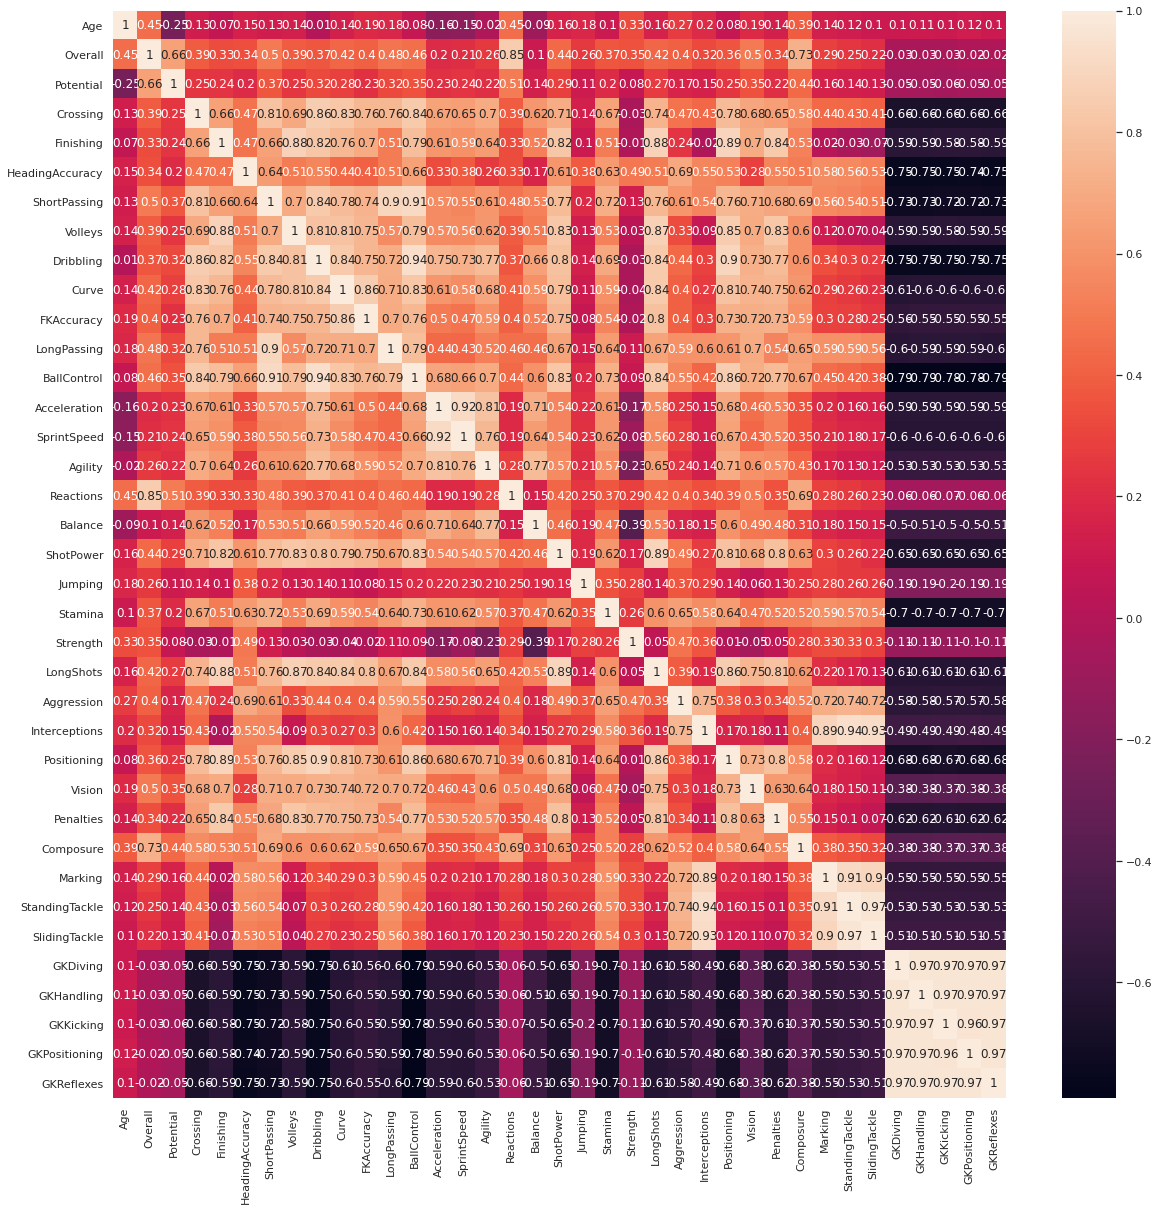

In [11]:
#plt.figure(figsize=(20,20))
#sns.heatmap(fifa.corr().round(2),annot=True)

In [12]:
from sklearn.preprocessing import StandardScaler, Normalizer

In [13]:
sc= StandardScaler()
sc.fit(fifa)
fifa2 = sc.transform(fifa)

In [14]:
fifa2

array([[ 1.25844069,  4.01336435,  3.69741542, ..., -0.07465947,
        -0.14024128, -0.48516121],
       [ 1.68666591,  4.01336435,  3.69741542, ..., -0.07465947,
        -0.14024128, -0.31807333],
       [ 0.18787765,  3.72411387,  3.53439634, ..., -0.07465947,
        -0.08153585, -0.31807333],
       ...,
       [-1.95324843, -2.78402193, -0.70409989, ..., -0.37764552,
        -0.6098847 , -0.20668142],
       [-1.73913582, -2.78402193, -0.86711898, ..., -0.13525668,
        -0.49247385, -0.42946525],
       [-1.95324843, -2.92864717, -0.86711898, ..., -0.43824273,
        -0.25765214, -0.42946525]])

In [15]:
pca = PCA(n_components=1)
pca.fit(fifa)
fifa_pca = pca.transform(fifa)

In [16]:
first_question = float(pca.explained_variance_ratio_)
round(first_question,3)

0.565

In [17]:
pca2 = PCA()
pca2.fit(fifa)
fifa_pca2 = pca2.transform(fifa)

In [18]:
fifa_pca2[0]

array([-126.71792515, -105.58000764,   52.2858198 ,   -6.21688136,
         -7.22493765,   -7.01028388,   17.54303813,   21.09160155,
        -10.36031423,    4.71115216,    3.76734941,    9.77808385,
         -1.49034326,    4.60830061,   -9.71791049,   -3.2546404 ,
          7.83271691,    2.65665606,  -12.62755765,    8.77683323,
          5.92399119,   -5.98934961,    6.1854783 ,   -6.11173831,
         -2.99429908,   -7.75527185,   -4.63671392,   -1.82815747,
         -4.49374764,   -1.86531521,    2.53916335,    4.91490193,
         -5.50283663,    1.88653932,    0.9686177 ,    4.25162305,
          0.47355666])

In [19]:
np.cumsum(pca2.explained_variance_ratio_)

array([0.56528056, 0.74630577, 0.80583411, 0.84926104, 0.87561427,
       0.88768504, 0.89804009, 0.9065696 , 0.91444823, 0.9216524 ,
       0.9288342 , 0.93516314, 0.94035556, 0.94526355, 0.95000564,
       0.95463336, 0.95888509, 0.96274797, 0.96651386, 0.97026478,
       0.97374294, 0.97701024, 0.98004162, 0.98301578, 0.98558376,
       0.98788729, 0.99003544, 0.9915968 , 0.99315032, 0.99423696,
       0.9953052 , 0.99636412, 0.99732226, 0.99821147, 0.9990712 ,
       0.99980581, 1.        ])

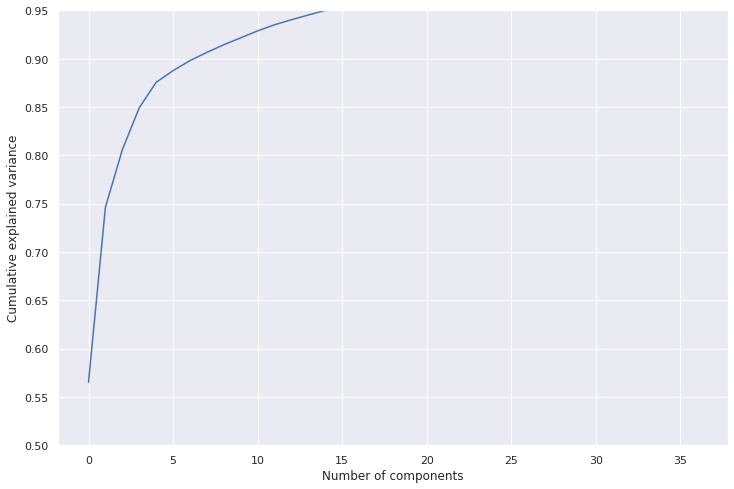

In [20]:
#plt.plot(np.cumsum(pca2.explained_variance_ratio_))

#plt.ylim(0.5,0.95)
#plt.xlabel('Number of components')
#plt.ylabel('Cumulative explained variance')
#plt.show()

In [21]:
x = [0.87747123,  -1.24990363,  -1.3191255, -36.7341814,
     -35.55091139, -37.29814417, -28.68671182, -30.90902583,
     -42.37100061, -32.17082438, -28.86315326, -22.71193348,
     -38.36945867, -20.61407566, -22.72696734, -25.50360703,
     2.16339005, -27.96657305, -33.46004736,  -5.08943224,
     -30.21994603,   3.68803348, -36.10997302, -30.86899058,
     -22.69827634, -37.95847789, -22.40090313, -30.54859849,
     -26.64827358, -19.28162344, -34.69783578, -34.6614351,
     48.38377664,  47.60840355,  45.76793876,  44.61110193,
     49.28911284
]

In [22]:
pca4 = PCA(2)
pca4.fit(fifa)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
#a_inv = pca4.inverse_transform(x)
#a_inv
np.dot(pca4.components_,x)

array([186.55588031,  -6.59243177])

In [24]:
a = [2,3,4]
b = [2,4,2]
c = [a,b]
np.dot

<function numpy.dot>

## Questão 1

Qual fração da variância consegue ser explicada pelo primeiro componente principal de `fifa`? Responda como um único float (entre 0 e 1) arredondado para três casas decimais.

In [25]:
def q1():
    # Retorne aqui o resultado da questão 1.
    return round(first_question,3)

## Questão 2

Quantos componentes principais precisamos para explicar 95% da variância total? Responda como un único escalar inteiro.

In [26]:
def q2():
    # Retorne aqui o resultado da questão 2.
    return 15

## Questão 3

Qual são as coordenadas (primeiro e segundo componentes principais) do ponto `x` abaixo? O vetor abaixo já está centralizado. Cuidado para __não__ centralizar o vetor novamente (por exemplo, invocando `PCA.transform()` nele). Responda como uma tupla de float arredondados para três casas decimais.

In [27]:
x = [0.87747123,  -1.24990363,  -1.3191255, -36.7341814,
     -35.55091139, -37.29814417, -28.68671182, -30.90902583,
     -42.37100061, -32.17082438, -28.86315326, -22.71193348,
     -38.36945867, -20.61407566, -22.72696734, -25.50360703,
     2.16339005, -27.96657305, -33.46004736,  -5.08943224,
     -30.21994603,   3.68803348, -36.10997302, -30.86899058,
     -22.69827634, -37.95847789, -22.40090313, -30.54859849,
     -26.64827358, -19.28162344, -34.69783578, -34.6614351,
     48.38377664,  47.60840355,  45.76793876,  44.61110193,
     49.28911284
]

In [40]:
def q3():
    # Retorne aqui o resultado da questão 3.
    return tuple(np.dot(pca4.components_,x).round(3))

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
features = list(fifa.columns)
features2 = []
for i in range(0,15):
  features2.append(features[i])


In [32]:
features2

['Age',
 'Overall',
 'Potential',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed']

In [33]:
from sklearn.feature_selection import RFE
target_feature = 'Overall'
y_train = fifa[target_feature]
x_train = fifa.drop(columns=target_feature)
rfe = RFE(LinearRegression(), n_features_to_select = 5).fit(x_train, y_train)


In [34]:
rfe.support_



array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True])

In [35]:
local_features = []
for i in range(0,len(rfe.support_)):
  if rfe.support_[i] == True:
    local_features.append(i)



In [36]:
local_features

[0, 1, 11, 15, 35]

In [37]:
list_name = []
filtred_features = list(x_train.columns)
for j in local_features:
  list_name.append(filtred_features[j])

In [38]:
list_name

['Age', 'Potential', 'BallControl', 'Reactions', 'GKReflexes']

## Questão 4

Realiza RFE com estimador de regressão linear para selecionar cinco variáveis, eliminando uma a uma. Quais são as variáveis selecionadas? Responda como uma lista de nomes de variáveis.

In [39]:
def q4():
    # Retorne aqui o resultado da questão 4.
    return list_name